# Clustering the Countries by using Unsupervised Learning for HELP International

## Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

## About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

## Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## Column
- country: Name of the country
- child_mort: Death of children under 5 years of age per 1000 live births
- exports: Exports of goods and services per capita. Given as %age of the GDP per capita
- health: Total health spending per capita. Given as %age of GDP per capita
- imports: Imports of goods and services per capita. Given as %age of the GDP per capita
- Income: Net income per person
- Inflation: The measurement of the annual growth rate of the Total GDP
- life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.

In [14]:
import pandas as pd
df = pd.read_csv('Country-data.csv', sep = ',', engine = 'python')
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [15]:
# handle missing checking
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

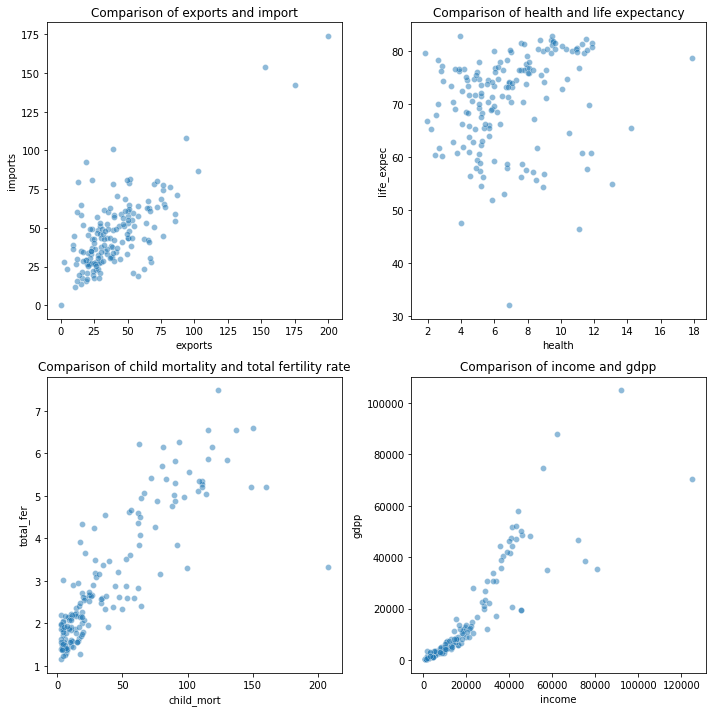

In [172]:
# analysis salary data in us dollar by using work_year, experience_level, employment_type
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'path_to_dataset.csv' with the actual path)
plot_df = df.copy()

# Create a figure with a single subplot
fig, ax = plt.subplots(2,2,figsize=(10,10))

sns.scatterplot(x='exports', y='imports', data=plot_df, ax=ax[0,0], palette='viridis', alpha=0.5)
ax[0,0].set_title('Comparison of exports and import')

sns.scatterplot(x='health', y='life_expec', data=plot_df, ax=ax[0,1], palette='cubehelix', alpha=0.5)
ax[0,1].set_title('Comparison of health and life expectancy')

sns.scatterplot(x='child_mort', y='total_fer', data=plot_df, ax=ax[1,0], palette='deep', alpha=0.5)
ax[1,0].set_title('Comparison of child mortality and total fertility rate')

sns.scatterplot(x='income', y='gdpp', data=plot_df, ax=ax[1,1], palette='rocket', alpha=0.5)
ax[1,1].set_title('Comparison of income and gdpp')

# Show the plot
plt.tight_layout()
plt.show()

In [156]:
columns = ["exports","imports"]

selected_df = df[columns].copy()
selected_df

,exports,imports
0,10.0,44.9
1,28.0,48.6
2,38.4,31.4
3,62.3,42.9
4,45.5,58.9
...,...,...
162,46.6,52.7
163,28.5,17.6
164,72.0,80.2
165,30.0,34.4


In [157]:
# normalized data
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
features = std.fit_transform(selected_df)
# features

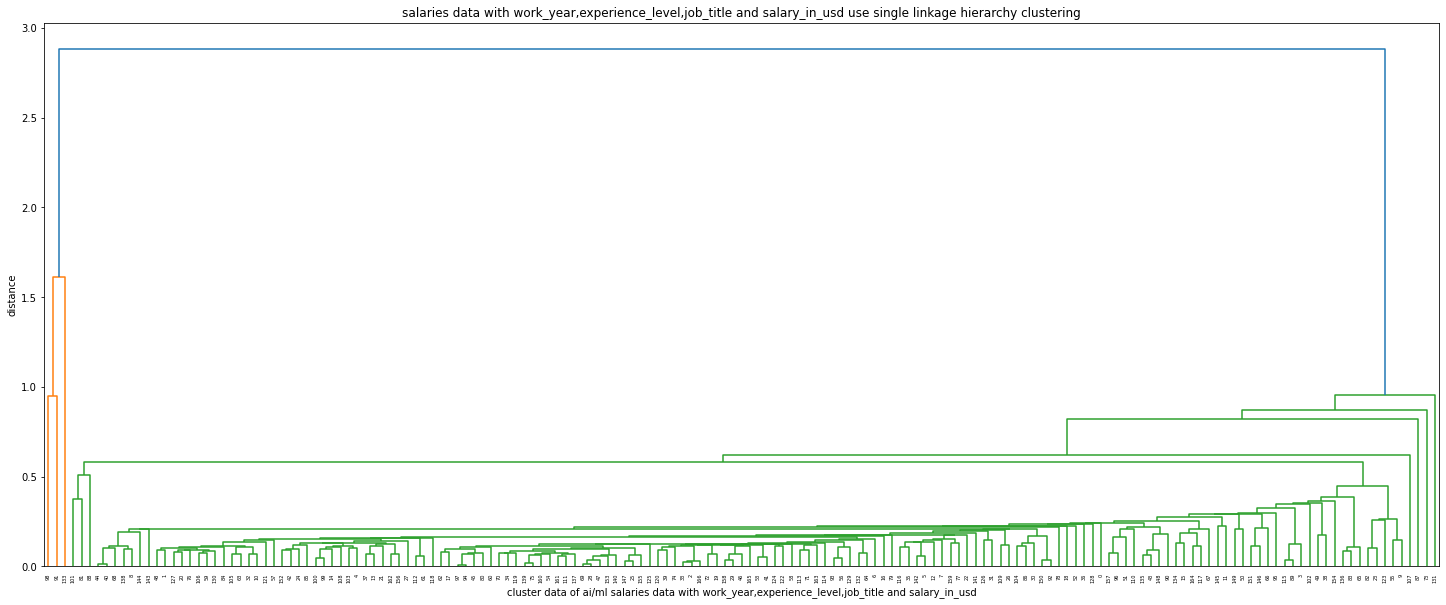

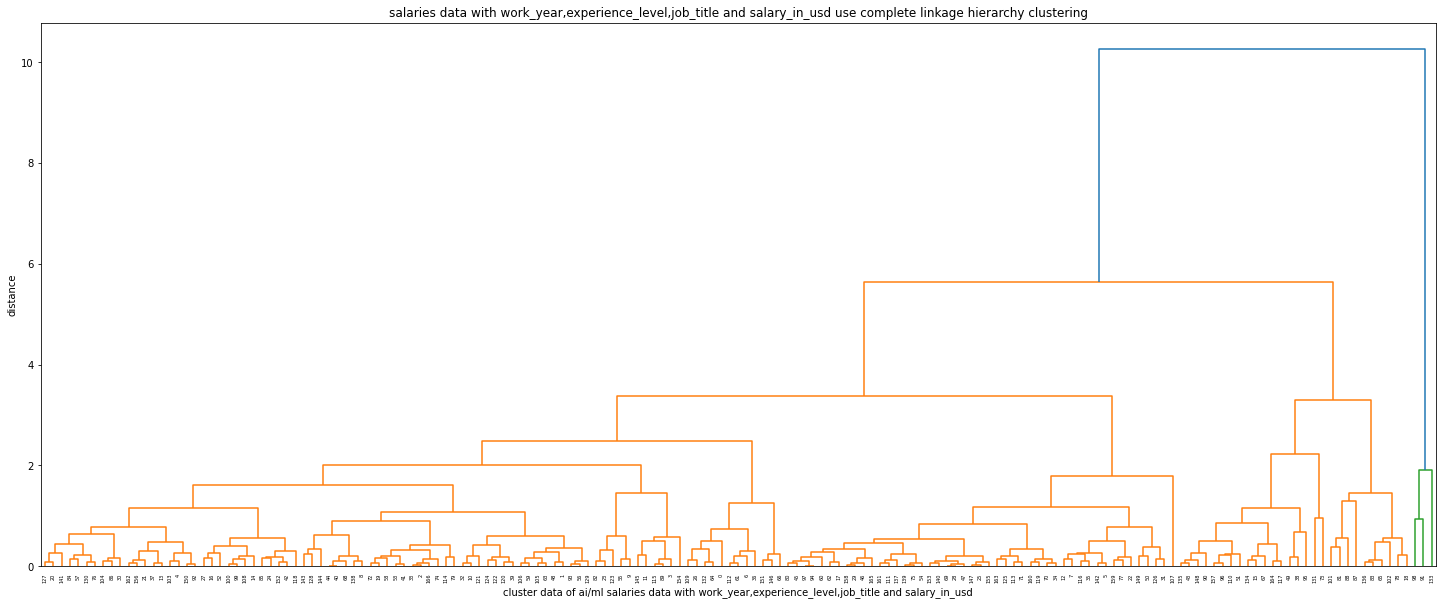

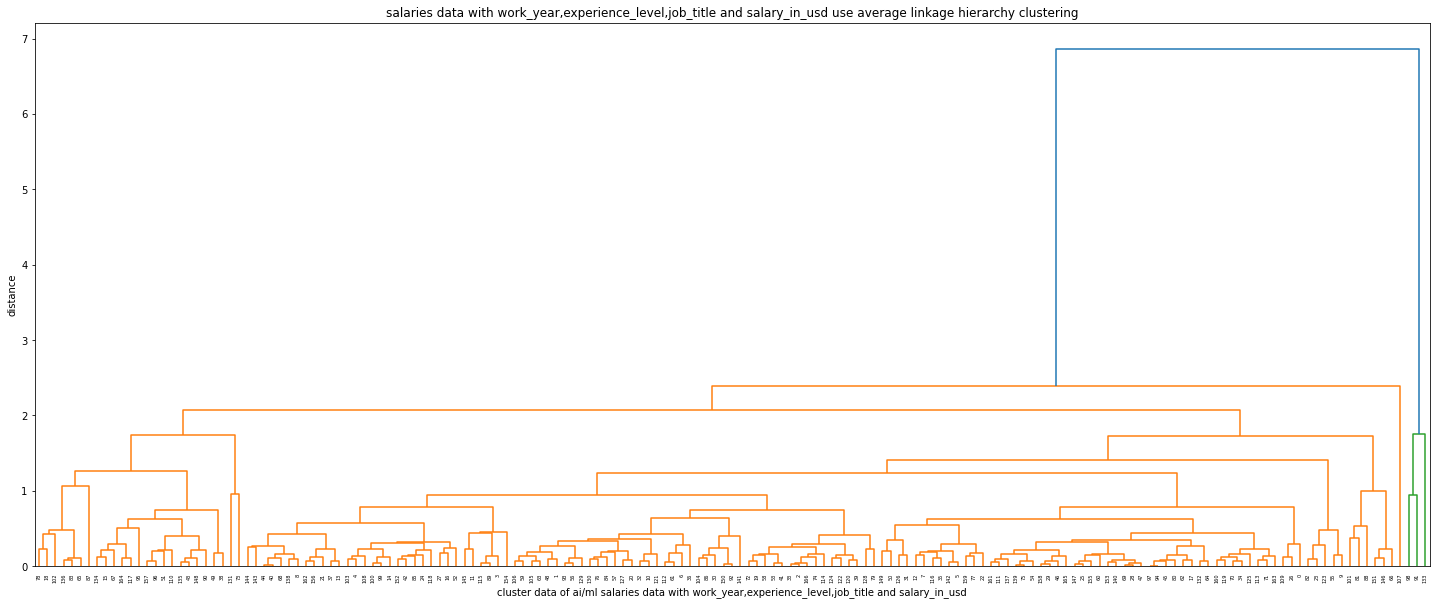

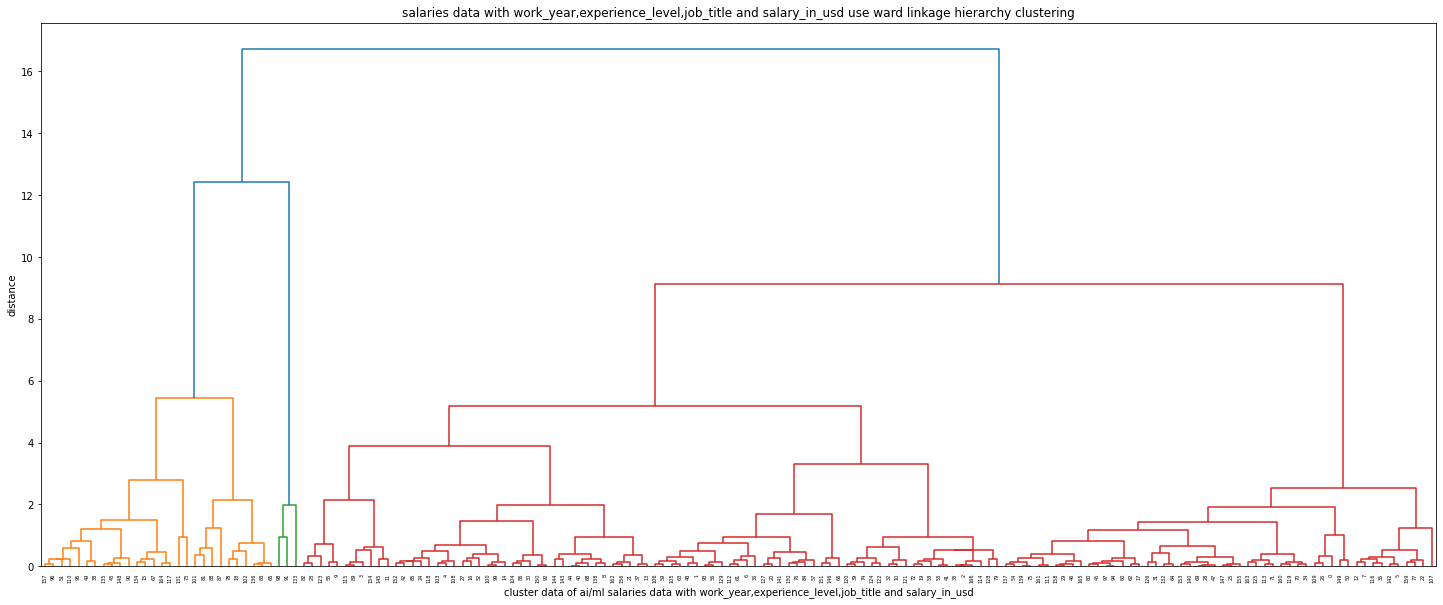

In [158]:
# heirarchy cluster
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from numpy import arange

# Create a linkage object.
methods = ['single','complete','average','ward']
linkage_col = dict()
for method in methods:
    # Create the figure and set it's size.
    plt.figure(figsize=(25,10))
    
    linkage_col[method] = linkage(features, method=method)
    

    # Make a dendrogram from the linkage object.
    dendrogram(linkage_col[method], orientation='top', distance_sort='descending')
    
    plt.xlabel("cluster data of ai/ml salaries data with work_year,experience_level,job_title and salary_in_usd")
    plt.ylabel("distance")
    plt.title(f"salaries data with work_year,experience_level,job_title and salary_in_usd use {method} linkage hierarchy clustering")
    plt.show()

<Figure size 1080x720 with 0 Axes>

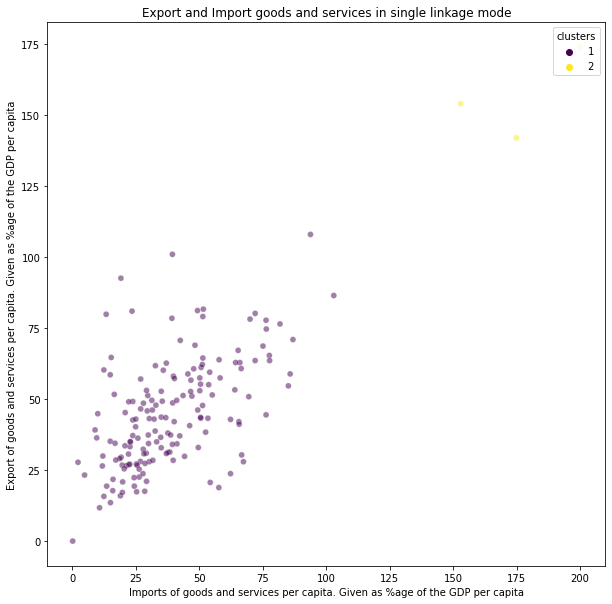

<Figure size 1080x720 with 0 Axes>

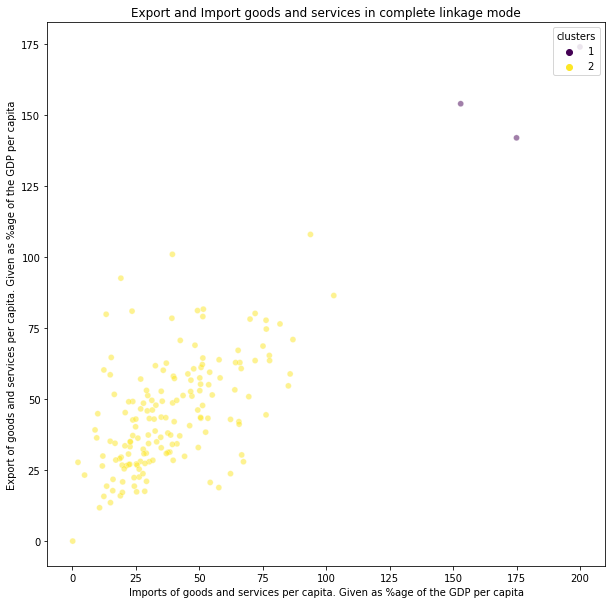

<Figure size 1080x720 with 0 Axes>

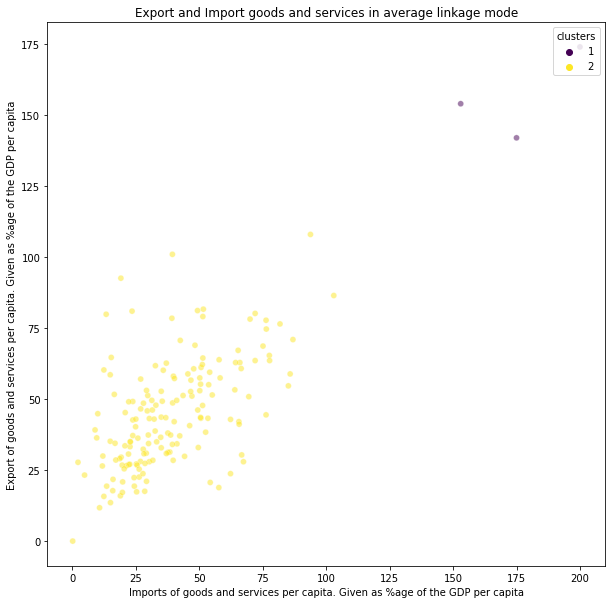

<Figure size 1080x720 with 0 Axes>

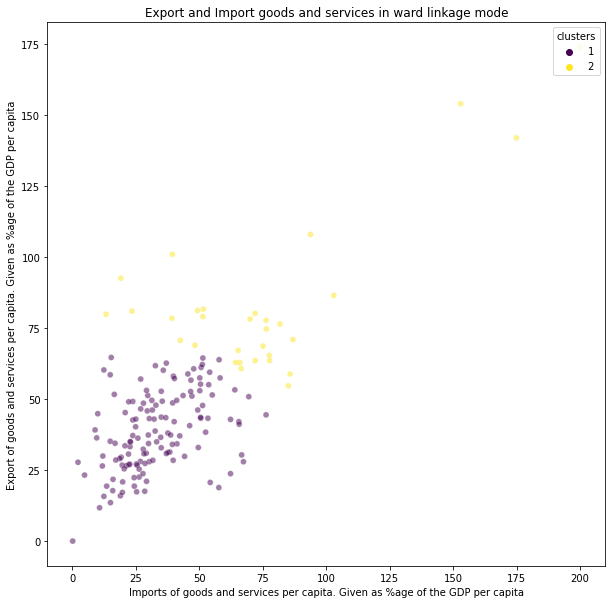

In [159]:
# Determine the clusters using fcluster
from scipy.cluster.hierarchy import fcluster


max_d = [2,8,4,14]  # Adjust this value based on the dendrogram
i = 0

del cluster_df["country"]

cluster_df = df.copy()
for method in methods:
    clusters = fcluster(linkage_col[method], t=max_d[i], criterion='distance')

    # Add the cluster labels to the DataFrame
    cluster_df['Cluster_'+method] = clusters

    # Plot the clusters
    plt.figure(figsize=(15, 10))

    # # Create scatter plot for each cluster
    # for cluster_id in selected_df['Cluster'].unique():
    #     cluster_df = cluster_df[cluster_df['Cluster'] == cluster_id]
    
    # sns.boxplot(x="work_year", y="salary_in_usd", data=cluster_df ,hue='Cluster', palette="deep")
    fig, ax = plt.subplots(figsize=(10,10))
    sns.scatterplot(x='exports', y='imports', data=cluster_df, hue='Cluster_'+method, ax=ax, palette='viridis', alpha=0.5, )
    ax.set_title('Comparison of exports and import')
    
    plt.ylabel("Export of goods and services per capita. Given as %age of the GDP per capita")
    plt.xlabel("Imports of goods and services per capita. Given as %age of the GDP per capita")
    plt.title(f"Export and Import goods and services in {method} linkage mode")
    plt.legend(title="clusters",loc="upper right")
    plt.show()
    i = i + 1

In [161]:
# evaluation
from sklearn.metrics import silhouette_score, rand_score, adjusted_rand_score,normalized_mutual_info_score
sil_scores = dict()
# ri_scores = dict()
# adr_scores = dict()
# nmi_scores = dict()

for method in methods:
    sil_scores[method] = round(silhouette_score(features,cluster_df['Cluster_'+method]),4) # use features check
    
# Range of K values
k_values = range(2, 11)  # Start from 2 as silhouette score requires at least 2 clusters

# Store the silhouette scores for each K
silhouette_scores = []

# Perform K-Means clustering and calculate silhouette score for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

print(f"silhouette score of features: \n{sil_scores}")

silhouette score of features: 
{'single': 0.797, 'complete': 0.797, 'average': 0.797, 'ward': 0.5142}


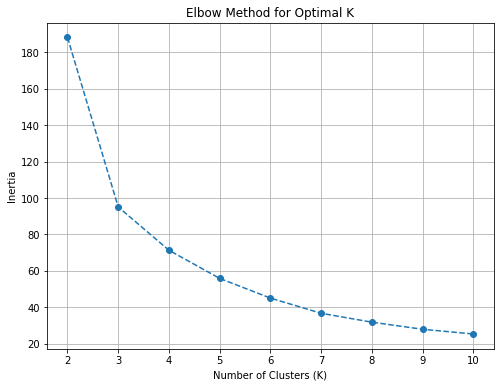

In [197]:
from sklearn.cluster import KMeans
inertia_values = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

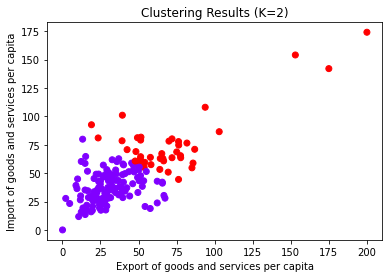

In [198]:
curvature = np.diff(inertia_values, 2)
best_k = curvature.argmax() + 2

best_kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_df['Cluster_Kmean'] = best_kmeans.fit_predict(features)

plt.scatter(cluster_df['exports'], cluster_df['imports'], c=cluster_df['Cluster_Kmean'], cmap='rainbow')
plt.xlabel('Export of goods and services per capita')
plt.ylabel('Import of goods and services per capita')
plt.title(f'Clustering Results (K={best_k})')
plt.show()

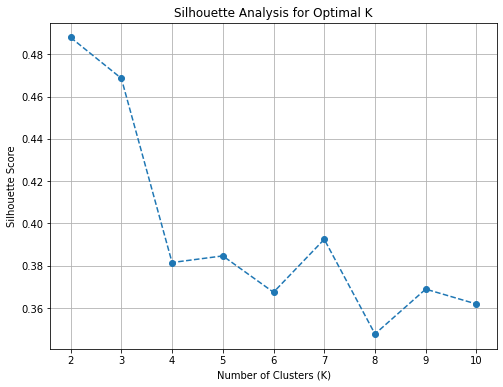

In [202]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.grid(True)
plt.show()

In [200]:
cluster_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_single,Cluster_complete,Cluster_average,Cluster_ward,Cluster_Kmean
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,2,2,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,2,2,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,2,2,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,2,2,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,2,2,1,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,2,2,1,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,2,2,2,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,2,2,1,0
